In [252]:
%matplotlib inline
import pandas as pd
import numpy as np

In [253]:
# V1: BY NEIGHBORHOOD
# trips = pd.read_csv("data.csv", index_col=0, parse_dates=True, header=None, names=['DATE','hood','count'])

In [254]:
# V2: NOT BY NEIGHBORHOOD, AGGREGATE
trips = pd.read_csv("data.csv", index_col=None, parse_dates=True, header=None, names=['DATE','hood','count'])
trips = trips.groupby(['DATE'])['count'].sum()
trips = trips.to_frame()

In [255]:
weather = pd.DataFrame.from_csv("NOAA.csv",index_col=2)
weather = weather[["PRCP","SNWD","SNOW","TMAX","TMIN"]]

In [268]:
holiday = pd.read_csv("bank_holidays.csv", index_col=1, parse_dates=True)
holiday['holiday'] = 1
holiday = holiday['holiday']
holiday = holiday.to_frame()

In [264]:
all_data = trips.merge(weather,left_index=True, right_index=True)

In [265]:
all_data['count'] = all_data['count'].astype(np.float64)
all_data['PRCP'] = all_data['PRCP'].astype(np.float64)
all_data['SNWD'] = all_data['SNWD'].astype(np.float64)
all_data['SNOW'] = all_data['SNOW'].astype(np.float64)
all_data['TMAX'] = all_data['TMAX'].astype(np.float64)
all_data['TMIN'] = all_data['TMIN'].astype(np.float64)

In [270]:
all_data = all_data.merge(holiday, how='left',left_index=True, right_index=True)

In [273]:
all_data = all_data.fillna(0)

In [276]:
out = all_data.ix['2014-01-01':'2015-12-31']
out.to_csv("r_data_v2.csv")

In [204]:
train = all_data.ix['2015-01-01':'2015-06-22']
test  = all_data.ix['2015-06-23':'2015-12-31']

train_count = train[['count']]
train_weather = train[["PRCP","SNWD","SNOW","TMAX","TMIN"]]

test_count = test[['count']]
test_weather = test[["PRCP","SNWD","SNOW","TMAX","TMIN"]]

In [205]:
import statsmodels as sm
chosen_order = (1,0,0)
arima = sm.tsa.arima_model.ARIMA(endog=train_count,order=chosen_order,
                 dates=train_count.index,exog=train_weather,freq='D')
arima_results = arima.fit(trend='c')

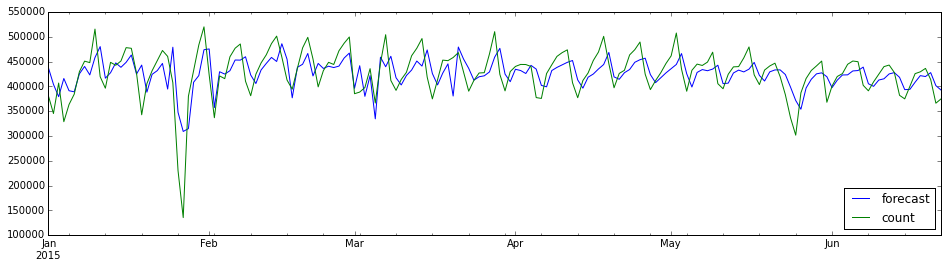

In [206]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,4))
fig = arima_results.plot_predict(ax=ax)
legend = ax.legend(loc='lower right')

In [207]:
arima_results.predict(start='2015-06-23',end='2015-07-01',exog=test_weather)

2015-06-23    389016.926467
2015-06-24    402788.557275
2015-06-25    409388.353403
2015-06-26    409559.746328
2015-06-27    402803.670011
2015-06-28    412099.434939
2015-06-29    415633.184200
2015-06-30    412122.332356
2015-07-01    420046.761542
Freq: D, dtype: float64

In [208]:
test_count

,count
2015-06-23,406139
2015-06-24,411370
2015-06-25,419739
2015-06-26,425774
2015-06-27,445861
2015-06-28,348433
2015-06-29,359808
2015-06-30,374240
2015-07-01,390084
2015-07-02,365953
